# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

In [84]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Fall 2025/A. FoAI9/NFL_Interest_January_value.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display data types and non-null counts
print("\nDataFrame Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,interest_level,nfl_community_care,player_credibility_social,content_frequency_weekly,content_watch_likelihood,content_pref_inspirational,content_pref_youth,content_pref_community,content_pref_funny,content_pref_highlights,...,race_native_american,race_asian,race_black,race_hispanic,race_middle_eastern,race_pacific_islander,race_white,race_other,is_parent,gender
0,9,4,6,5,3,0,0,0,1,1,...,0,1,0,0,0,0,0,0,2,1
1,10,7,8,5,4,1,0,0,1,1,...,0,1,0,0,0,0,0,0,2,1
2,10,5,7,5,4,1,0,0,1,1,...,0,0,0,0,0,0,1,0,2,2
3,7,6,7,3,3,0,0,0,1,1,...,0,0,0,0,0,0,1,0,2,1
4,1,3,1,2,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,2



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   interest_level                 935 non-null    int64
 1   nfl_community_care             935 non-null    int64
 2   player_credibility_social      935 non-null    int64
 3   content_frequency_weekly       935 non-null    int64
 4   content_watch_likelihood       935 non-null    int64
 5   content_pref_inspirational     935 non-null    int64
 6   content_pref_youth             935 non-null    int64
 7   content_pref_community         935 non-null    int64
 8   content_pref_funny             935 non-null    int64
 9   content_pref_highlights        935 non-null    int64
 10  content_pref_other             935 non-null    int64
 11  has_fav_team                   935 non-null    int64
 12  has_fav_player                 935 non-null    int64
 13  has

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from datetime import datetime

# ============================================
# SETUP
# ============================================
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f'/content/drive/MyDrive/Fall 2025/A. FoAI9/NFL_Interest_Analysis_{timestamp}'
os.makedirs(output_dir, exist_ok=True)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set target variable
TARGET = 'interest_level'

print("="*60)
print("NFL INTEREST LEVEL - DESCRIPTIVE ANALYSIS")
print("="*60)

# ============================================
# 1. SMART VARIABLE CLASSIFICATION
# ============================================
def classify_variable(series, col_name):
    """Intelligently classify variable type"""
    if col_name == TARGET:
        return 'target'

    unique_vals = series.dropna().unique()
    n_unique = len(unique_vals)

    # Binary variables (0/1, Yes/No, etc.)
    if n_unique == 2:
        return 'binary'

    # Ordinal/Likert scale (1-5, 1-7, etc.)
    if n_unique <= 7 and series.dtype in ['int64', 'float64']:
        if set(unique_vals).issubset(set(range(1, 8))):
            return 'ordinal'

    # Categorical with few categories
    if n_unique <= 10 and series.dtype == 'object':
        return 'categorical'

    # Continuous numerical
    if series.dtype in ['int64', 'float64'] and n_unique > 10:
        return 'continuous'

    return 'other'

# Classify all variables
var_types = {}
for col in df.columns:
    var_types[col] = classify_variable(df[col], col)

# Group variables by type (excluding target)
binary_vars = [col for col, vtype in var_types.items() if vtype == 'binary']
ordinal_vars = [col for col, vtype in var_types.items() if vtype == 'ordinal']
categorical_vars = [col for col, vtype in var_types.items() if vtype == 'categorical']
continuous_vars = [col for col, vtype in var_types.items() if vtype == 'continuous']

print(f"\n📊 Dataset Overview:")
print(f"  • Total observations: {len(df)}")
print(f"  • Binary variables: {len(binary_vars)}")
print(f"  • Ordinal/Likert variables: {len(ordinal_vars)}")
print(f"  • Categorical variables: {len(categorical_vars)}")
print(f"  • Continuous variables: {len(continuous_vars)}")
print(f"  • Target: {TARGET} ({var_types[TARGET]})")

# ============================================
# 2. TARGET VARIABLE ANALYSIS
# ============================================
print(f"\n🎯 Analyzing Target: {TARGET}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution
if var_types[TARGET] in ['ordinal', 'continuous']:
    value_counts = df[TARGET].value_counts().sort_index()
    axes[0].bar(value_counts.index, value_counts.values,
                color='#3498db', alpha=0.7, edgecolor='black')
    axes[0].axvline(df[TARGET].mean(), color='red', linestyle='--',
                   linewidth=2.5, label=f'Mean: {df[TARGET].mean():.2f}')
    axes[0].axvline(df[TARGET].median(), color='green', linestyle='--',
                   linewidth=2.5, label=f'Median: {df[TARGET].median():.2f}')
    axes[0].set_title(f'Distribution of {TARGET}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Interest Level')
    axes[0].set_ylabel('Frequency')
    axes[0].legend(fontsize=11)
    axes[0].grid(alpha=0.3, axis='y')

    # Percentage breakdown
    pct_breakdown = (value_counts / len(df) * 100).sort_index()
    axes[1].bar(pct_breakdown.index, pct_breakdown.values,
                color='#e74c3c', alpha=0.7, edgecolor='black')
    axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Interest Level')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].grid(alpha=0.3, axis='y')

    # Cumulative distribution
    cumulative = pct_breakdown.cumsum()
    axes[2].plot(cumulative.index, cumulative.values,
                 marker='o', linewidth=2.5, markersize=8, color='#27ae60')
    axes[2].fill_between(cumulative.index, cumulative.values, alpha=0.3, color='#27ae60')
    axes[2].set_title('Cumulative Distribution', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Interest Level')
    axes[2].set_ylabel('Cumulative Percentage (%)')
    axes[2].grid(alpha=0.3)
    axes[2].set_ylim([0, 100])

plt.tight_layout()
plt.savefig(f'{output_dir}/01_interest_level_overview.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: Interest level overview")

# Summary statistics
target_stats = {
    'Mean': df[TARGET].mean(),
    'Median': df[TARGET].median(),
    'Mode': df[TARGET].mode()[0],
    'Std Dev': df[TARGET].std(),
    'Min': df[TARGET].min(),
    'Max': df[TARGET].max(),
    'Range': df[TARGET].max() - df[TARGET].min(),
    'Skewness': df[TARGET].skew(),
    'Kurtosis': df[TARGET].kurtosis()
}

with open(f'{output_dir}/01_interest_level_statistics.txt', 'w') as f:
    f.write(f"INTEREST LEVEL - DESCRIPTIVE STATISTICS\n")
    f.write("="*60 + "\n\n")
    for key, value in target_stats.items():
        f.write(f"{key}: {value:.3f}\n")
    f.write("\n")
    f.write("Distribution by Level:\n")
    for level, count in df[TARGET].value_counts().sort_index().items():
        pct = (count / len(df)) * 100
        f.write(f"  Level {level}: {count} ({pct:.1f}%)\n")

# ============================================
# 3. CORRELATION ANALYSIS - WHAT DRIVES INTEREST?
# ============================================
numerical_vars = ordinal_vars + continuous_vars

if len(numerical_vars) > 0:
    # Calculate correlations with interest_level
    correlations = df[numerical_vars].corrwith(df[TARGET]).sort_values(key=abs, ascending=False)

    # Separate positive and negative correlations
    pos_corrs = correlations[correlations > 0].sort_values(ascending=False)
    neg_corrs = correlations[correlations < 0].sort_values(ascending=True)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, max(6, len(correlations) * 0.3)))

    # Positive correlations
    if len(pos_corrs) > 0:
        pos_corrs.plot(kind='barh', ax=ax1, color='#27ae60', alpha=0.7)
        ax1.set_title('Positive Drivers of Interest', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Correlation Coefficient')
        ax1.grid(alpha=0.3, axis='x')
        ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    else:
        ax1.text(0.5, 0.5, 'No positive correlations',
                ha='center', va='center', fontsize=12)
        ax1.set_xticks([])
        ax1.set_yticks([])

    # Negative correlations
    if len(neg_corrs) > 0:
        neg_corrs.plot(kind='barh', ax=ax2, color='#e74c3c', alpha=0.7)
        ax2.set_title('Negative Drivers of Interest', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Correlation Coefficient')
        ax2.grid(alpha=0.3, axis='x')
        ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    else:
        ax2.text(0.5, 0.5, 'No negative correlations',
                ha='center', va='center', fontsize=12)
        ax2.set_xticks([])
        ax2.set_yticks([])

    plt.tight_layout()
    plt.savefig(f'{output_dir}/02_interest_drivers.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: Interest level drivers")

    # Save correlation data
    correlations.to_csv(f'{output_dir}/02_correlations_with_interest.csv')

    # ============================================
    # 4. TOP PREDICTORS - SCATTER PLOTS
    # ============================================
    top_predictors = correlations.abs().nlargest(min(9, len(correlations))).index.tolist()

    if len(top_predictors) > 0:
        n_cols = 3
        n_rows = int(np.ceil(len(top_predictors) / n_cols))

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()

        for idx, predictor in enumerate(top_predictors):
            if idx < len(axes):
                # Scatter plot
                axes[idx].scatter(df[predictor], df[TARGET],
                                alpha=0.4, s=40, color='steelblue', edgecolor='black', linewidth=0.5)

                # Trend line
                mask = df[[predictor, TARGET]].notna().all(axis=1)
                if mask.sum() > 1:
                    z = np.polyfit(df.loc[mask, predictor], df.loc[mask, TARGET], 1)
                    p = np.poly1d(z)
                    x_line = np.linspace(df[predictor].min(), df[predictor].max(), 100)
                    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2.5, alpha=0.8)

                corr_val = correlations[predictor]
                axes[idx].set_title(f'{predictor}\nCorrelation: {corr_val:.3f}',
                                   fontsize=11, fontweight='bold')
                axes[idx].set_xlabel(predictor)
                axes[idx].set_ylabel(TARGET)
                axes[idx].grid(alpha=0.3)

        # Hide extra subplots
        for idx in range(len(top_predictors), len(axes)):
            axes[idx].set_visible(False)

        plt.suptitle(f'Top Predictors of {TARGET}', fontsize=16, fontweight='bold', y=1.00)
        plt.tight_layout()
        plt.savefig(f'{output_dir}/03_top_predictors_scatter.png', dpi=300, bbox_inches='tight')
        plt.close()
        print("✓ Saved: Top predictors scatter plots")

# ============================================
# 5. BINARY VARIABLES - INTEREST BY GROUP
# ============================================
if len(binary_vars) > 0:
    # Calculate mean interest by binary category
    binary_comparison = {}
    for var in binary_vars:
        grouped = df.groupby(var)[TARGET].agg(['mean', 'count', 'std'])
        binary_comparison[var] = grouped

    # Visualize significant differences
    fig, axes = plt.subplots(int(np.ceil(len(binary_vars) / 3)), 3,
                             figsize=(15, int(np.ceil(len(binary_vars) / 3)) * 4))
    if len(binary_vars) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, var in enumerate(binary_vars):
        if idx < len(axes):
            grouped = binary_comparison[var]

            # Bar plot with error bars
            x_pos = np.arange(len(grouped))
            axes[idx].bar(x_pos, grouped['mean'],
                         yerr=grouped['std'], capsize=5,
                         color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
            axes[idx].set_xticks(x_pos)
            axes[idx].set_xticklabels(grouped.index)
            axes[idx].set_ylabel(f'Mean {TARGET}')
            axes[idx].set_title(f'{var}\n(n={grouped["count"].values})',
                               fontsize=11, fontweight='bold')
            axes[idx].grid(alpha=0.3, axis='y')

            # Add difference annotation
            if len(grouped) == 2:
                diff = grouped['mean'].iloc[1] - grouped['mean'].iloc[0]
                axes[idx].text(0.5, max(grouped['mean']) * 1.05,
                              f'Δ = {diff:+.2f}',
                              ha='center', fontsize=10, fontweight='bold')

    # Hide extra subplots
    for idx in range(len(binary_vars), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle(f'Binary Variables: Impact on {TARGET}',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/04_binary_impact.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: Binary variables impact")

    # Save comparison data
    with open(f'{output_dir}/04_binary_comparison.txt', 'w') as f:
        f.write("BINARY VARIABLES - INTEREST LEVEL COMPARISON\n")
        f.write("="*60 + "\n\n")
        for var in binary_vars:
            f.write(f"\n{var}:\n")
            f.write(binary_comparison[var].to_string())
            f.write("\n" + "-"*60 + "\n")

# ============================================
# 6. CATEGORICAL VARIABLES - INTEREST BY CATEGORY
# ============================================
if len(categorical_vars) > 0:
    for cat_var in categorical_vars[:5]:  # Limit to top 5
        grouped = df.groupby(cat_var)[TARGET].agg(['mean', 'count', 'std']).sort_values('mean', ascending=False)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Mean interest by category
        grouped['mean'].plot(kind='barh', ax=ax1, color='steelblue', alpha=0.7)
        ax1.set_xlabel(f'Mean {TARGET}')
        ax1.set_title(f'Average Interest by {cat_var}', fontsize=12, fontweight='bold')
        ax1.grid(alpha=0.3, axis='x')

        # Sample size
        grouped['count'].plot(kind='barh', ax=ax2, color='coral', alpha=0.7)
        ax2.set_xlabel('Sample Size')
        ax2.set_title(f'Sample Size by {cat_var}', fontsize=12, fontweight='bold')
        ax2.grid(alpha=0.3, axis='x')

        plt.tight_layout()
        plt.savefig(f'{output_dir}/05_categorical_{cat_var}.png', dpi=300, bbox_inches='tight')
        plt.close()

    print("✓ Saved: Categorical variables analysis")

# ============================================
# 7. CORRELATION MATRIX - FULL PICTURE
# ============================================
if len(numerical_vars) > 1:
    # Include target in correlation
    all_numerical = numerical_vars + [TARGET] if TARGET not in numerical_vars else numerical_vars
    corr_matrix = df[all_numerical].corr()

    plt.figure(figsize=(14, 12))

    # Highlight target row/column
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
                cmap='RdBu_r', center=0, square=True, linewidths=0.5,
                cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

    # Highlight interest_level row/column
    if TARGET in corr_matrix.index:
        target_idx = corr_matrix.index.get_loc(TARGET)
        plt.gca().add_patch(plt.Rectangle((0, target_idx), len(corr_matrix), 1,
                                          fill=False, edgecolor='yellow', lw=3))
        plt.gca().add_patch(plt.Rectangle((target_idx, 0), 1, len(corr_matrix),
                                          fill=False, edgecolor='yellow', lw=3))

    plt.title('Correlation Matrix (Target Highlighted in Yellow)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/06_full_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: Full correlation matrix")

# ============================================
# 8. INTEREST SEGMENTS - PROFILE HIGH vs LOW
# ============================================
# Create interest segments
df['interest_segment'] = pd.cut(df[TARGET], bins=3, labels=['Low', 'Medium', 'High'])

segment_summary = df.groupby('interest_segment').size()

plt.figure(figsize=(10, 6))
segment_summary.plot(kind='bar', color=['#e74c3c', '#f39c12', '#27ae60'], alpha=0.7, edgecolor='black')
plt.title('Interest Level Segments', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'{output_dir}/07_interest_segments.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: Interest segments")

# Profile each segment
if len(numerical_vars) > 0:
    segment_profiles = df.groupby('interest_segment')[numerical_vars[:10]].mean()  # Top 10 vars

    plt.figure(figsize=(14, max(6, len(segment_profiles.columns) * 0.4)))
    segment_profiles.T.plot(kind='barh', figsize=(14, max(6, len(segment_profiles.columns) * 0.4)))
    plt.title('Interest Segment Profiles', fontsize=14, fontweight='bold')
    plt.xlabel('Mean Value')
    plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/08_segment_profiles.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: Segment profiles")

# ============================================
# 9. EXECUTIVE SUMMARY
# ============================================
with open(f'{output_dir}/00_EXECUTIVE_SUMMARY.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("NFL INTEREST LEVEL - EXECUTIVE SUMMARY\n")
    f.write("="*60 + "\n")
    f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Total Observations: {len(df)}\n\n")

    f.write("TARGET VARIABLE: interest_level\n")
    f.write("-" * 60 + "\n")
    f.write(f"Mean Interest Level: {df[TARGET].mean():.2f}\n")
    f.write(f"Median Interest Level: {df[TARGET].median():.2f}\n")
    f.write(f"Standard Deviation: {df[TARGET].std():.2f}\n\n")

    f.write("Distribution:\n")
    for level, count in df[TARGET].value_counts().sort_index().items():
        pct = (count / len(df)) * 100
        f.write(f"  Level {level}: {count} ({pct:.1f}%)\n")

    f.write("\n" + "="*60 + "\n")
    f.write("TOP 5 POSITIVE DRIVERS OF INTEREST:\n")
    f.write("-" * 60 + "\n")
    if len(correlations) > 0:
        for var, corr in correlations.nlargest(5).items():
            f.write(f"  {var}: {corr:.3f}\n")

    f.write("\n" + "="*60 + "\n")
    f.write("TOP 5 NEGATIVE DRIVERS OF INTEREST:\n")
    f.write("-" * 60 + "\n")
    if len(correlations) > 0:
        for var, corr in correlations.nsmallest(5).items():
            f.write(f"  {var}: {corr:.3f}\n")

    f.write("\n" + "="*60 + "\n")
    f.write("FILES GENERATED:\n")
    f.write("-" * 60 + "\n")
    for file in sorted(os.listdir(output_dir)):
        if file != '00_EXECUTIVE_SUMMARY.txt':
            f.write(f"  • {file}\n")

print("\n" + "="*60)
print("✅ INTEREST LEVEL ANALYSIS COMPLETE!")
print("="*60)
print(f"\nLocation: {output_dir}")
print("\n📊 Key Insights Saved:")
print("  • Interest level distribution & statistics")
print("  • Correlation analysis (what drives interest)")
print("  • Top predictors with scatter plots")
print("  • Binary & categorical impact analysis")
print("  • Interest segment profiles")
print("  • Full correlation matrix")
print("\n💾 Ready to download from Google Drive!")

NFL INTEREST LEVEL - DESCRIPTIVE ANALYSIS

📊 Dataset Overview:
  • Total observations: 935
  • Binary variables: 62
  • Ordinal/Likert variables: 13
  • Categorical variables: 0
  • Continuous variables: 1
  • Target: interest_level (target)

🎯 Analyzing Target: interest_level
✓ Saved: Interest level overview
✓ Saved: Interest level drivers
✓ Saved: Top predictors scatter plots
✓ Saved: Binary variables impact
✓ Saved: Full correlation matrix


/tmp/ipython-input-1651805928.py:368: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby('interest_segment').size()


✓ Saved: Interest segments


/tmp/ipython-input-1651805928.py:384: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_profiles = df.groupby('interest_segment')[numerical_vars[:10]].mean()  # Top 10 vars


✓ Saved: Segment profiles

✅ INTEREST LEVEL ANALYSIS COMPLETE!

Location: /content/drive/MyDrive/Fall 2025/A. FoAI9/NFL_Interest_Analysis_20260111_014617

📊 Key Insights Saved:
  • Interest level distribution & statistics
  • Correlation analysis (what drives interest)
  • Top predictors with scatter plots
  • Binary & categorical impact analysis
  • Interest segment profiles
  • Full correlation matrix

💾 Ready to download from Google Drive!


<Figure size 1400x600 with 0 Axes>

# Data Validation

In [92]:
import numpy as np

# Define column groups for validation
# Assuming typical survey data structures based on column names

# Likert Scale or similar (typically 0-10 or 1-10)
scale_cols = [
    'interest_level', 'nfl_community_care', 'player_credibility_social',
    'content_frequency_weekly', 'content_watch_likelihood',
    'nfl_values_me',
    'nfl_credibility_social_issues',
    'nfl_supports_physical', 'nfl_supports_mental', 'nfl_supports_emotional'
] + [c for c in df.columns if c.startswith('content_pref_')] \
  + [c for c in df.columns if c.startswith('value_')] # Assuming 'value_' columns are ratings

# Binary Columns (0 or 1)
binary_cols = [
    'has_fav_team', 'has_fav_player', 'has_neither',
    'is_parent'
] + [c for c in df.columns if c.startswith('aware_')] \
  + [c for c in df.columns if c.startswith('intro_')] \
  + [c for c in df.columns if c.startswith('driver_')] \
  + [c for c in df.columns if c.startswith('barrier_')] \
  + [c for c in df.columns if c.startswith('issue_')] \
  + [c for c in df.columns if c.startswith('watched_')] \
  + [c for c in df.columns if c.startswith('race_')]

# Demographic / Specific Ranges
demo_cols = {
    'age': {'min': 10, 'max': 100}, # Assuming a reasonable age range
    'gender': {'allowed': [1, 2, 3, 4]} # Assuming 1-4 are valid codes
}

print(f"Schema defined: {len(scale_cols)} scale cols, {len(binary_cols)} binary cols, {len(demo_cols)} demo cols.")

Schema defined: 22 scale cols, 56 binary cols, 2 demo cols.


In [93]:
def validate_data(data, scale_cols, binary_cols, demo_cols):
    report = {"valid": True, "errors": []}

    # Check Scale Columns
    for col in scale_cols:
        if col not in data.columns:
            report["errors"].append(f"Missing column: {col}")
            report["valid"] = False
            continue

        # Check type (allow numeric)
        if not np.issubdtype(data[col].dtype, np.number):
             report["errors"].append(f"Column {col} is not numeric.")
             report["valid"] = False

        # Check range (assuming 0-10 based on typical survey data in this context)
        # Adjust min/max if the specific scale is known (e.g., 1-7)
        if not data[col].between(0, 10).all():
            invalid_count = (~data[col].between(0, 10)).sum()
            report["errors"].append(f"Column {col} has {invalid_count} values out of range [0, 10].")
            report["valid"] = False

    # Check Binary Columns
    for col in binary_cols:
        if col not in data.columns:
            report["errors"].append(f"Missing column: {col}")
            report["valid"] = False
            continue

        if not data[col].isin([0, 1]).all():
            invalid_count = (~data[col].isin([0, 1])).sum()
            report["errors"].append(f"Column {col} has {invalid_count} non-binary values.")
            report["valid"] = False

    # Check Demographic/Specific Columns
    for col, rules in demo_cols.items():
        if col not in data.columns:
            report["errors"].append(f"Missing column: {col}")
            report["valid"] = False
            continue

        if 'min' in rules and 'max' in rules:
            if not data[col].between(rules['min'], rules['max']).all():
                invalid_count = (~data[col].between(rules['min'], rules['max'])).sum()
                report["errors"].append(f"Column {col} has {invalid_count} values outside range [{rules['min']}, {rules['max']}].")
                report["valid"] = False

        if 'allowed' in rules:
            if not data[col].isin(rules['allowed']).all():
                 invalid_count = (~data[col].isin(rules['allowed'])).sum()
                 report["errors"].append(f"Column {col} has {invalid_count} invalid categorical values.")
                 report["valid"] = False

    return report

# Run validation
validation_report = validate_data(df, scale_cols, binary_cols, demo_cols)

print("Validation Report:")
if validation_report["valid"]:
    print("Data conforms to the schema.")
else:
    print("Data validation violations found:")
    for error in validation_report["errors"]:
        print(f"- {error}")

Validation Report:
Data validation violations found:
- Column is_parent has 756 non-binary values.


In [80]:
import pandas as pd

# Reload the dataset to ensure a clean state
df = pd.read_csv('/content/drive/MyDrive/Fall 2025/A. FoAI9/NFL_Interest_January_value.csv')

# Re-apply the gender filter
df = df[~df['gender'].isin([3, 4])]

# Fix schema violation in 'is_parent'
# Mapping 2 to 0 (No) and 1 to 1 (Yes)
df['is_parent'] = df['is_parent'].map({2: 0, 1: 1})

# Re-run validation
validation_report = validate_data(df, scale_cols, binary_cols, demo_cols)

print("Validation Report (After Fix):")
if validation_report["valid"]:
    print("Data conforms to the schema.")
else:
    print("Data validation violations found:")
    for error in validation_report["errors"]:
        print(f"- {error}")

Validation Report (After Fix):
Data conforms to the schema.


In [77]:
# Inspect the unique values and value counts for the 'is_parent' column
print("Unique values in 'is_parent':", df['is_parent'].unique())
print("\nValue counts for 'is_parent':")
print(df['is_parent'].value_counts())

Unique values in 'is_parent': [0 1]

Value counts for 'is_parent':
is_parent
0    756
1    179
Name: count, dtype: int64


In [94]:
# Compute summary statistics for numerical columns
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,interest_level,nfl_community_care,player_credibility_social,content_frequency_weekly,content_watch_likelihood,content_pref_inspirational,content_pref_youth,content_pref_community,content_pref_funny,content_pref_highlights,...,race_native_american,race_asian,race_black,race_hispanic,race_middle_eastern,race_pacific_islander,race_white,race_other,is_parent,gender
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,...,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,6.727273,5.251337,4.712299,3.233155,2.677005,0.522995,0.214973,0.375401,0.688770,0.679144,...,0.011765,0.101604,0.025668,0.089840,0.026738,0.008556,0.801070,0.012834,1.808556,1.607487
std,2.889369,2.267434,2.243145,1.370839,0.808451,0.499738,0.411024,0.484485,0.463244,0.467055,...,0.107883,0.302289,0.158229,0.286105,0.161403,0.092152,0.399409,0.112619,0.393648,0.556207
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,7.000000,5.000000,5.000000,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
75%,9.000000,7.000000,6.000000,5.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,10.000000,10.000000,10.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000


#Data Preparation & Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('interest_level', axis=1)
y = df['interest_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Data preparation complete.
Training set shape: (748, 79)
Testing set shape: (187, 79)


In [ ]:
# Define bins and labels for categorization
bins = [0, 3, 8, 10]
labels = ['Non-fan', 'Casual Fan', 'Avid Fan']

# Create the new 'interest_category' column
df['interest_category'] = pd.cut(df['interest_level'], bins=bins, labels=labels)

# Display value counts to verify distribution
print("Value counts for 'interest_category':")
print(df['interest_category'].value_counts())

Value counts for 'interest_category':
interest_category
Casual Fan    458
Avid Fan      312
Non-fan       165
Name: count, dtype: int64


# Model 1: Logistic Regression

## Model Training

In [ ]:
from sklearn.metrics import accuracy_score

for n_features in [5, 10, 15, 20]:
    # Feature selection
    selector = RFE(
        estimator=LogisticRegression(max_iter=1000),
        n_features_to_select=n_features
    )
    selector.fit(X_train_scaled, y_train)

    # Transform data
    X_train_sel = selector.transform(X_train_scaled)
    X_test_sel = selector.transform(X_test_scaled)

    # Train NEW model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_sel, y_train)

    # Evaluate
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)

    print(f"{n_features} features - Accuracy: {acc:.3f}")

5 features - Accuracy: 0.717
10 features - Accuracy: 0.738
15 features - Accuracy: 0.738
20 features - Accuracy: 0.749


In [ ]:
selector_10 = RFE(estimator=LogisticRegression(max_iter=1000),
                   n_features_to_select=10)
selector_10.fit(X_train_scaled, y_train)

print("Top 10 features:")
print(X.columns[selector_10.support_].tolist())


Top 10 features:
['nfl_community_care', 'player_credibility_social', 'content_frequency_weekly', 'content_watch_likelihood', 'has_fav_team', 'driver_game_excitement', 'driver_fantasy', 'barrier_no_time', 'age', 'gender']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define features and target
# Drop original target 'interest_level' and current target 'interest_category' from predictors
X = df.drop(['interest_level', 'interest_category'], axis=1)
y = df['interest_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression estimator for RFE
estimator = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Initialize RFE to select top 10 features
rfe = RFE(estimator=estimator, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# Identify selected features
selected_features = X.columns[rfe.support_]

# Transform the training and testing sets to include only selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

print(f"\nShape of X_train after RFE: {X_train_rfe.shape}")


Shape of X_train after RFE: (748, 10)


## Model Visualization

Feature Coefficients DataFrame:


,Avid Fan,Casual Fan,Non-fan
nfl_community_care,0.387078,0.094076,-0.481153
player_credibility_social,0.269001,0.068353,-0.337354
content_frequency_weekly,0.532792,-0.063641,-0.469151
content_watch_likelihood,0.713889,0.151945,-0.865834
has_fav_team,0.455258,0.033988,-0.489246


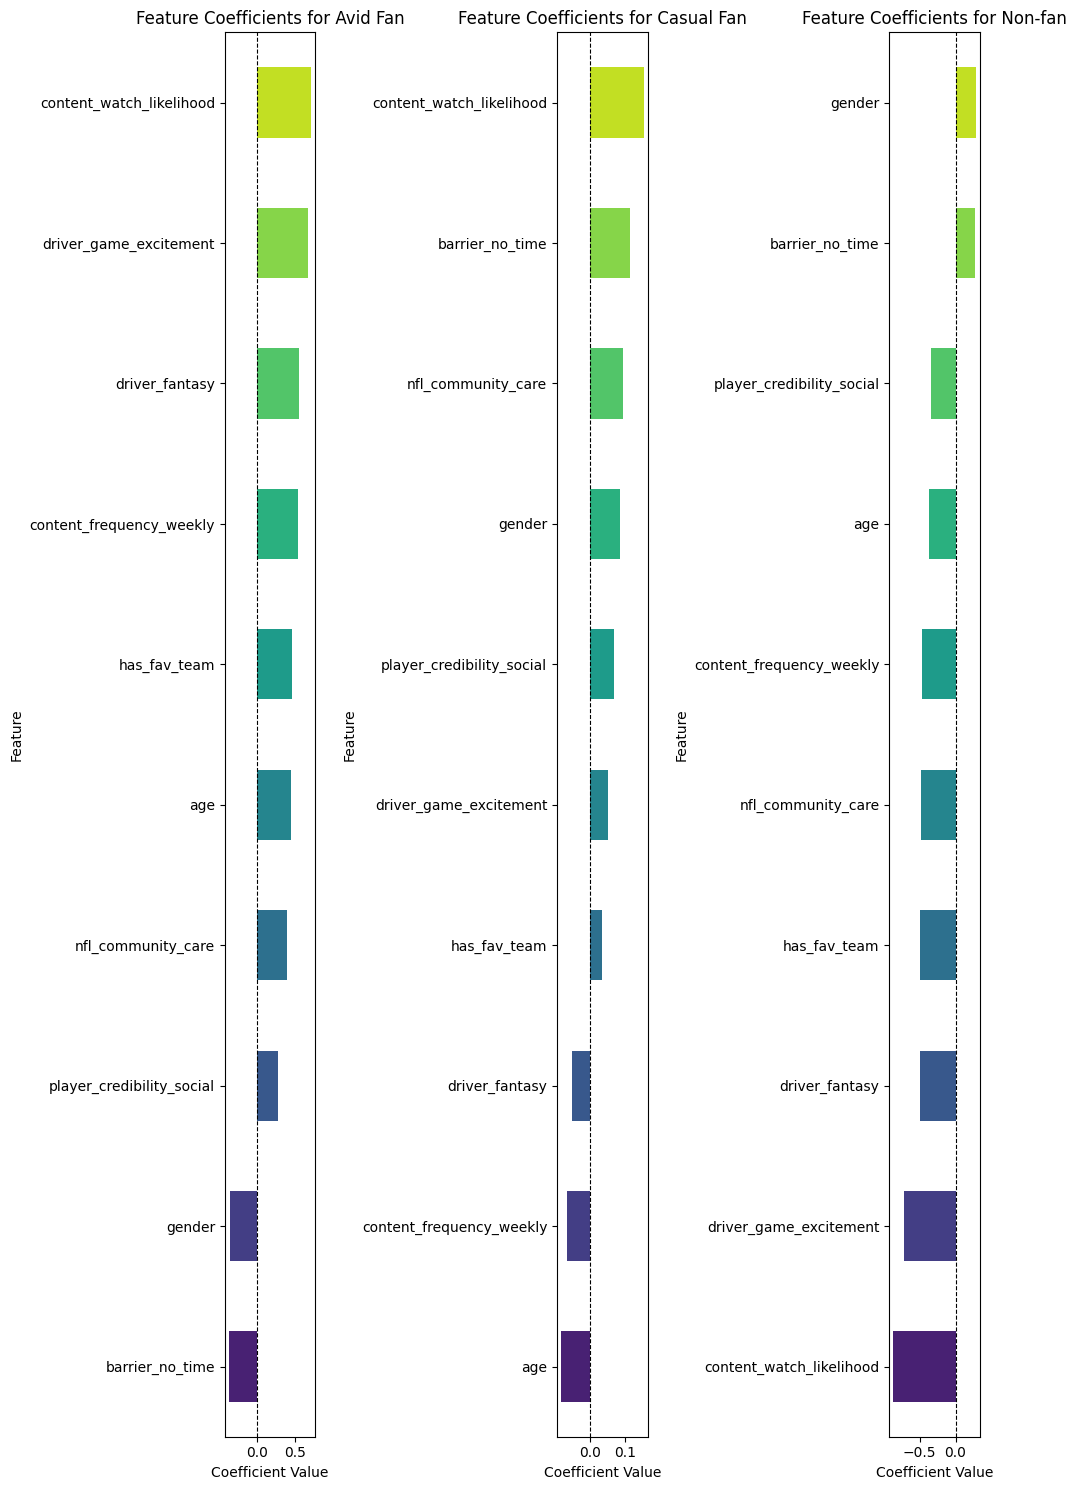

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame(
    log_reg_rfe.coef_.T,
    index=selected_features,
    columns=log_reg_rfe.classes_
)

# Display the coefficients DataFrame
print("Feature Coefficients DataFrame:")
display(coef_df.head())

# Plot coefficients for each class
plt.figure(figsize=(10, 15))

for i, class_name in enumerate(coef_df.columns):
    # Sort features by coefficient value for the current class
    sorted_coefs = coef_df[class_name].sort_values()

    # Create a subplot
    plt.subplot(1, 3, i + 1)

    # Create a horizontal bar chart
    sorted_coefs.plot(kind='barh', color=sns.color_palette("viridis", len(sorted_coefs)))

    plt.title(f'Feature Coefficients for {class_name}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

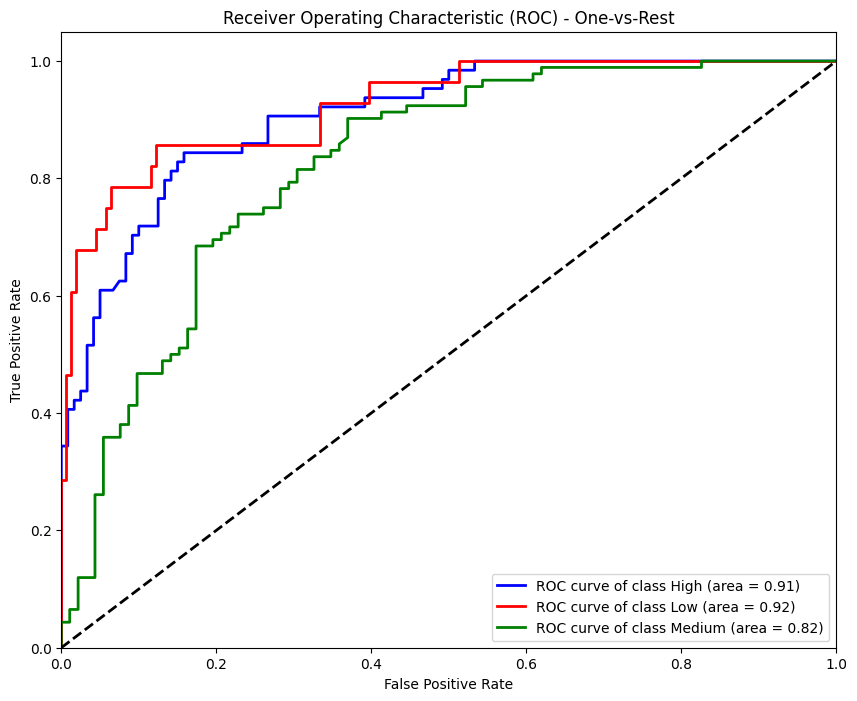

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output using the model's classes to ensure order alignment
classes = log_reg_rfe.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = log_reg_rfe.predict_proba(X_test_rfe)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - One-vs-Rest')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation

Classification Report (Top 10 Features):
              precision    recall  f1-score   support

    Avid Fan       0.74      0.71      0.72        59
  Casual Fan       0.74      0.73      0.74        94
     Non-fan       0.73      0.79      0.76        34

    accuracy                           0.74       187
   macro avg       0.74      0.75      0.74       187
weighted avg       0.74      0.74      0.74       187



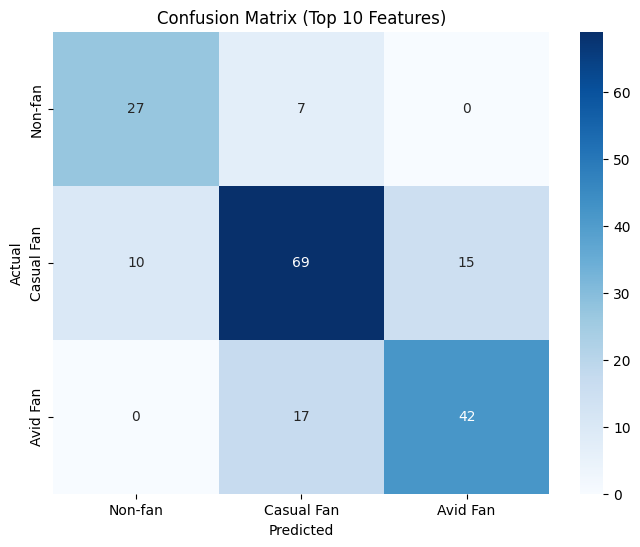

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the Logistic Regression model
# The default multi_class='auto' will select 'multinomial' for this multiclass problem
log_reg_rfe = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model using the features selected by RFE
log_reg_rfe.fit(X_train_rfe, y_train)

# Generate predictions on the test set
y_pred_rfe = log_reg_rfe.predict(X_test_rfe)

# Print classification report
print("Classification Report (Top 10 Features):")
print(classification_report(y_test, y_pred_rfe))

# Compute confusion matrix
# Re-using 'labels' defined earlier: ['Low', 'Medium', 'High']
cm_rfe = confusion_matrix(y_test, y_pred_rfe, labels=labels)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Top 10 Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2: Random Forest Classifier


##Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data (using features selected by RFE)
rf_clf.fit(X_train_rfe, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


##Model Evaluation

Random Forest Classification Report:
              precision    recall  f1-score   support

    Avid Fan       0.73      0.76      0.74        59
  Casual Fan       0.71      0.69      0.70        94
     Non-fan       0.65      0.65      0.65        34

    accuracy                           0.71       187
   macro avg       0.70      0.70      0.70       187
weighted avg       0.71      0.71      0.71       187



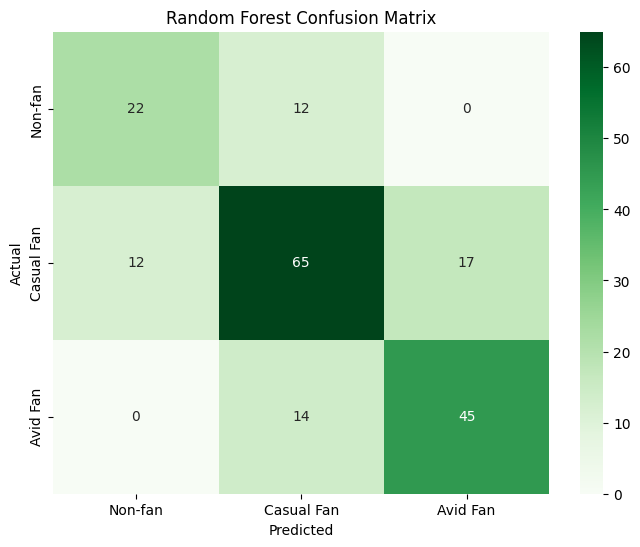

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred_rf = rf_clf.predict(X_test_rfe)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Calculate metrics for Logistic Regression (RFE)
acc_log = accuracy_score(y_test, y_pred_rfe)
prec_log, rec_log, f1_log, _ = precision_recall_fscore_support(y_test, y_pred_rfe, average='weighted')

# Calculate metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf, rec_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Logistic Regression (RFE)': [acc_log, prec_log, rec_log, f1_log],
    'Random Forest': [acc_rf, prec_rf, rec_rf, f1_rf]
})

print("Model Performance Comparison:")
display(comparison_df)

Model Performance Comparison:


,Metric,Logistic Regression (RFE),Random Forest
0,Accuracy,0.737968,0.705882
1,Precision (Weighted),0.738109,0.705698
2,Recall (Weighted),0.737968,0.705882
3,F1-Score (Weighted),0.737713,0.705553


#Deep Learning: Neural Network

## Neural Network Building


**Reasoning**:
To prepare the target variables for a neural network, I will import `to_categorical` from TensorFlow, convert `y_train` and `y_test` into a one-hot encoded format, and then print their shapes to confirm the transformation.



In [96]:
from tensorflow.keras.utils import to_categorical
import numpy as np # Import numpy for potential use with the binarized labels

# Convert y_train to one-hot encoded format
# First, map the categorical strings to numerical labels (0, 1, 2) before one-hot encoding
# Ensure the order of classes matches the order in which they were handled previously
class_labels = ['Non-fan', 'Casual Fan', 'Avid Fan']
label_mapping = {label: i for i, label in enumerate(class_labels)}
y_train_numeric = y_train.map(label_mapping)
y_test_numeric = y_test.map(label_mapping)

y_train_one_hot = to_categorical(y_train_numeric, num_classes=len(class_labels))
y_test_one_hot = to_categorical(y_test_numeric, num_classes=len(class_labels))

print(f"Original y_train shape: {y_train.shape}")
print(f"One-hot encoded y_train shape: {y_train_one_hot.shape}")
print(f"Original y_test shape: {y_test.shape}")
print(f"One-hot encoded y_test shape: {y_test_one_hot.shape}")

Original y_train shape: (748,)
One-hot encoded y_train shape: (748, 3)
Original y_test shape: (187,)
One-hot encoded y_test shape: (187, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features from X_train_rfe
input_dim = X_train_rfe.shape[1]

# Get the number of classes from y_train_one_hot
num_classes = y_train_one_hot.shape[1]

# Initialize the Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_dim=input_dim, activation='relu'))

# Add a hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer for multiclass classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Neural Network Model Defined and Compiled.")
model.summary()

Neural Network Model Defined and Compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features from X_train_rfe
input_dim = X_train_rfe.shape[1]

# Get the number of classes from y_train_one_hot
num_classes = y_train_one_hot.shape[1]

# Initialize the Sequential model
model = Sequential()

# Add the input layer, fixing the UserWarning by using input_shape
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))

# Add a hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer for multiclass classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Neural Network Model Defined and Compiled.")
model.summary()

Neural Network Model Defined and Compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Get the number of features from X_train_rfe
input_dim = X_train_rfe.shape[1]

# Get the number of classes from y_train_one_hot
num_classes = y_train_one_hot.shape[1]

# Initialize the Sequential model
model = Sequential()

# Add an explicit Input layer to address the UserWarning
model.add(Input(shape=(input_dim,)))

# Add the first Dense layer (no longer needs input_shape)
model.add(Dense(64, activation='relu'))

# Add a hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer for multiclass classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Neural Network Model Defined and Compiled.")
model.summary()

Neural Network Model Defined and Compiled.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

## Neural Network Training

### Subtask:
Train the compiled neural network model using the `X_train_rfe` (RFE-selected and scaled features) and the one-hot encoded `y_train` data. Use a validation split to monitor performance during training.


**Reasoning**:
I will train the neural network model using the `fit` method with the provided training data, epochs, batch size, and a validation split to monitor performance.



In [99]:
history = model.fit(X_train_rfe, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

print("Neural Network model trained successfully.")

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4851 - loss: 1.0582 - val_accuracy: 0.5600 - val_loss: 0.9230
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6884 - loss: 0.8617 - val_accuracy: 0.6267 - val_loss: 0.8175
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7091 - loss: 0.7489 - val_accuracy: 0.6800 - val_loss: 0.7496
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6846 - loss: 0.6908 - val_accuracy: 0.6933 - val_loss: 0.7019
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6954 - loss: 0.6518 - val_accuracy: 0.6933 - val_loss: 0.6812
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7447 - loss: 0.5946 - val_accuracy: 0.6933 - val_loss: 0.6697
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7639 - loss: 0.5750 - val_accuracy: 0.6933 - val_loss: 0.6670
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7866 - loss: 0.5494 - val_accuracy: 0.6933 - val_l

**Reasoning**:
The neural network model has been trained. Now, I will evaluate its performance on the test set by predicting class probabilities, converting them to class labels, and then generating a classification report and confusion matrix to assess the model's effectiveness.



##Neural Network Evaluation

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

     Non-fan       0.65      0.71      0.68        34
  Casual Fan       0.72      0.68      0.70        94
    Avid Fan       0.70      0.73      0.72        59

    accuracy                           0.70       187
   macro avg       0.69      0.71      0.70       187
weighted avg       0.70      0.70      0.70       187



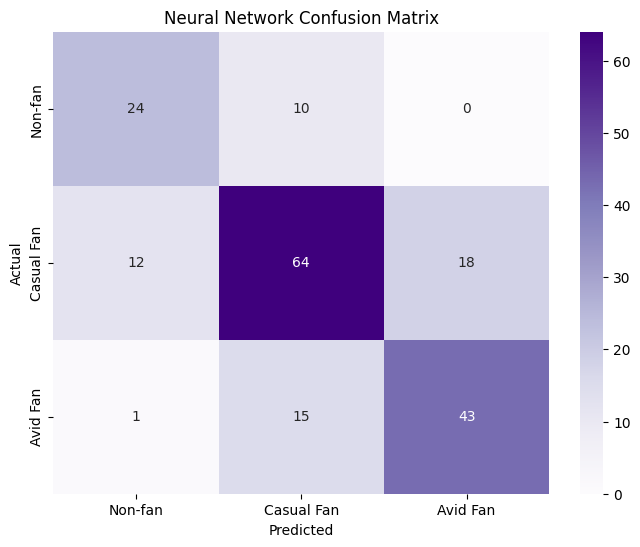

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities on the test set
y_pred_prob_nn = model.predict(X_test_rfe)
# Convert probabilities to class labels
y_pred_nn = np.argmax(y_pred_prob_nn, axis=1)

# Convert y_test_one_hot back to categorical labels for comparison
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Map numerical predictions back to original class names for clarity
predicted_class_names = [class_labels[idx] for idx in y_pred_nn]
actual_class_names = [class_labels[idx] for idx in y_test_labels]

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(actual_class_names, predicted_class_names, labels=class_labels))

# Compute confusion matrix
cm_nn = confusion_matrix(actual_class_names, predicted_class_names, labels=class_labels)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Extract metrics for Neural Network
acc_nn = accuracy_score(y_test_labels, y_pred_nn)
prec_nn, rec_nn, f1_nn, _ = precision_recall_fscore_support(y_test_labels, y_pred_nn, average='weighted')

# Create a new DataFrame for NN metrics
nn_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Neural Network': [acc_nn, prec_nn, rec_nn, f1_nn]
})

# Merge with the existing comparison_df
comparison_df = pd.merge(comparison_df, nn_metrics_df, on='Metric', how='left')

print("Neural Network metrics extracted and added to comparison DataFrame.")


Neural Network metrics extracted and added to comparison DataFrame.


**Reasoning**:
Display the updated comparison DataFrame, which now includes the Neural Network's performance metrics, to allow for a direct comparison with the other models.



#Models Comparison

In [95]:
print("Model Performance Comparison (Including Neural Network):")
display(comparison_df)

Model Performance Comparison (Including Neural Network):


,Metric,Logistic Regression (RFE),Random Forest,Neural Network
0,Accuracy,0.737968,0.705882,0.700535
1,Precision (Weighted),0.738109,0.705698,0.701817
2,Recall (Weighted),0.737968,0.705882,0.700535
3,F1-Score (Weighted),0.737713,0.705553,0.700630


#Best Model Saving

In [ ]:
import joblib

# Save the Logistic Regression model
joblib.dump(log_reg_rfe, 'logistic_regression_model.pkl')
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

# Save the StandardScaler
joblib.dump(scaler, 'standard_scaler.pkl')
print("StandardScaler saved as 'standard_scaler.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'
StandardScaler saved as 'standard_scaler.pkl'
